# Problem 2: Numerical Solution

solver: 房伯文

### (a). Fock Basis

In [25]:
import numpy as np

for ncut in range(2, 20, 4):
# ncut = 5
    a = np.diag(np.sqrt(np.arange(1, ncut)), 1)
    adag = a.T
    x = (a + adag)/np.sqrt(2)
    p = 1j*(adag - a)/np.sqrt(2)

    H = 0.5*(p @ p) + (x @ x @ x @ x)
    energies = np.linalg.eigvalsh(H)
    print("n_cut = ", ncut)
    print("Ground state:", energies[0])
    print("First excited:", energies[1])


n_cut =  2
Ground state: 0.4999999999999999
First excited: 0.4999999999999999
n_cut =  6
Ground state: 0.6588907058622121
First excited: 2.3099333565552502
n_cut =  10
Ground state: 0.6696405029659387
First excited: 2.386161758763962
n_cut =  14
Ground state: 0.6676925408503991
First excited: 2.3866499820534517
n_cut =  18
Ground state: 0.6679817677668918
First excited: 2.39374747048674


### (b). Shooting Method

Ground state energy: 0.668
First excited energy: 2.394


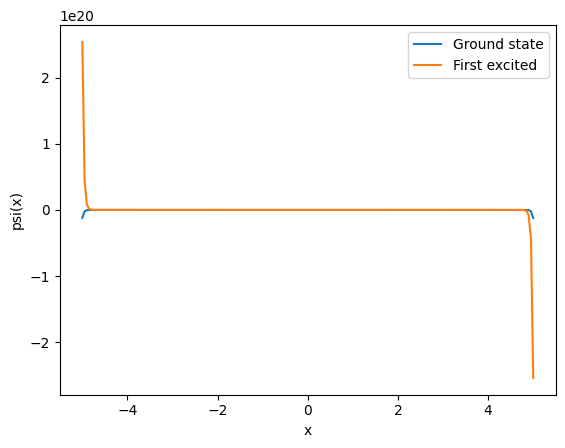

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Setup ODE system using the shooting method
def schrodinger(x, y, E):
    psi, phi = y   # psi: state, phi: derivative
    dpsi_dx = phi
    dphi_dx = 2*(x**4 - E)*psi
    return [dpsi_dx, dphi_dx]

# Shooting function
def shoot(E, parity='even'):
    if parity == 'even':
        y0 = [1.0, 0.0]  # ground state
    else:
        y0 = [0.0, 1.0]  # first excited
    sol = solve_ivp(lambda x, y: schrodinger(x, y, E), 
                    [0, 5], y0, 
                    t_eval=[5],
                    method="RK45",
                    max_step=0.005,
                    rtol=1e-10,
                    atol=1e-12
                    )
    # print(sol.y[0,-1])
    # if parity == 'even':
            # print("even")
    return sol.y[0,-1]  # psi(5)

# Find energies, shooting method
E_ground = brentq(lambda E: shoot(E, 'even'), 0.5, 1.0)
# E_second = brentq(lambda E: shoot(E, 'even'), 1.0, 3)
E_first = brentq(lambda E: shoot(E, 'odd'), 1.5, 2.5)

print("Ground state energy:", round(E_ground, 3))
print("First excited energy:", round(E_first, 3))
# print("Second excited energy:", round(E_second, 3))

# Compute wavefunctions for plotting
x_vals = np.linspace(0, 5, 100)
sol_ground = solve_ivp(lambda x, y: schrodinger(x, y, E_ground), [0, 5], [1,0], t_eval=x_vals)
sol_first = solve_ivp(lambda x, y: schrodinger(x, y, E_first), [0, 5], [0,1], t_eval=x_vals)

# Use symmetry to extend to [-5,0]
x_full = np.concatenate([-x_vals[::-1], x_vals])
psi_ground_full = np.concatenate([sol_ground.y[0][::-1], sol_ground.y[0]])
psi_first_full = np.concatenate([-sol_first.y[0][::-1], sol_first.y[0]])

# Plot
plt.plot(x_full, psi_ground_full, label='Ground state')
plt.plot(x_full, psi_first_full, label='First excited')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.legend()
plt.show()


### Conclusion
- The result from the two methods are pretty much consistent. However, due to the difficulty of convergence in *odd* state, the graph seemes to be very strange.